In [1]:
!pip install pandas numpy scikit-learn surprise matplotlib seaborn nltk flask streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505175 sha256=cf3e4dfced1b150e26da219b7fed0dfddb29e228a007ba3b7870f6ed578d2605
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import csv  # Required for quoting=3
import os  # For checking file existence

# File path
file_path = '/content/Amazon_Product_Reviews.csv'

# Check if file exists before loading
if not os.path.exists(file_path):
    raise FileNotFoundError(f"⚠️ The file '{file_path}' was not found. Please check the file path.")

# Load the dataset with error handling
df = pd.read_csv(file_path, on_bad_lines='skip', quoting=csv.QUOTE_NONE)
print("✅ Dataset Loaded Successfully")
print(df.head())

# Convert column names to lowercase for case-insensitive matching
df.columns = df.columns.str.lower()

# Data Preprocessing
df.dropna(inplace=True)
le = LabelEncoder()

# Check if 'user_id' exists; if not, find alternatives
user_id_column = None
possible_user_id_columns = ['userid', 'user_id', 'user id', 'id']

for col in possible_user_id_columns:
    if col in df.columns:
        user_id_column = col
        df.rename(columns={col: 'user_id'}, inplace=True)
        print(f"🔹 Renamed column '{col}' to 'user_id'")
        break

if not user_id_column:
    print(f"⚠️ Columns in DataFrame: {df.columns}")
    raise KeyError("Could not find 'User_ID' or a suitable alternative.")

# Check if 'product_id' exists; if not, find alternatives
product_id_column = None
possible_product_id_columns = ['productid', 'product_id', 'product id', 'id']

for col in possible_product_id_columns:
    if col in df.columns:
        product_id_column = col
        df.rename(columns={col: 'product_id'}, inplace=True)
        print(f"🔹 Renamed column '{col}' to 'product_id'")
        break

if not product_id_column:
    print(f"⚠️ Columns in DataFrame: {df.columns}")
    raise KeyError("Could not find 'Product_ID' or a suitable alternative.")

# Encode categorical columns
df['user_id'] = le.fit_transform(df['user_id'])
df['product_id'] = le.fit_transform(df['product_id'])

print("✅ Data Preprocessing Completed!")
print(df.info())  # Show dataset summary





✅ Dataset Loaded Successfully
   Id   ProductId          UserId    ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW     delmartian                     1   
1   2  B00813GRG4  A1D87F6ZCVE5NK         dll pa                     0   
2   4  B000UA0QIQ  A395BORC6FGVXV           Karl                     3   
3   9  B000E7L2R4  A1MZYO9TZK0BBI       R. James                     1   
4  10  B00171APVA  A21BT40VZCCYT4  Carol A. Reed                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   
2                       3      2  1307923200         Cough Medicine   
3                       1      5  1322006400             Yay Barley   
4                       0      5  1351209600       Healthy Dog Food   

                                                Text  
0  I have bought several of the Vitality ca

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Dataset Loaded Successfully
   Id   ProductId          UserId    ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW     delmartian                     1   
1   2  B00813GRG4  A1D87F6ZCVE5NK         dll pa                     0   
2   4  B000UA0QIQ  A395BORC6FGVXV           Karl                     3   
3   9  B000E7L2R4  A1MZYO9TZK0BBI       R. James                     1   
4  10  B00171APVA  A21BT40VZCCYT4  Carol A. Reed                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   
2                       3      2  1307923200         Cough Medicine   
3                       1      5  1322006400             Yay Barley   
4                       0      5  1351209600       Healthy Dog Food   

                                                Text  
0  I have bought several of the Vitality ca

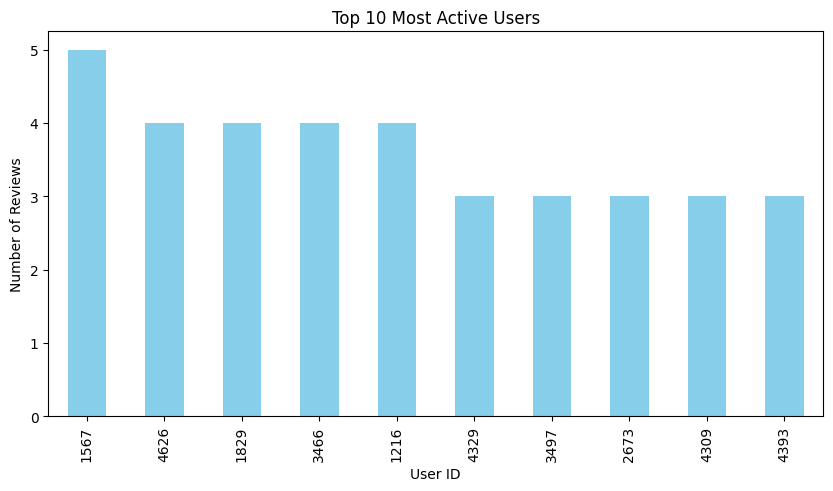

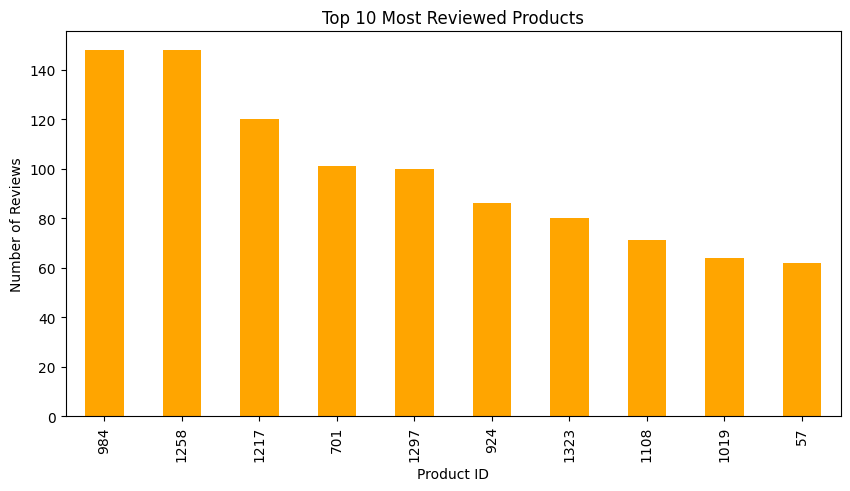

⚠️ 'review_text' column not found. Skipping Word Cloud.
🔹 Cleaned Data Saved ✅


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from surprise import SVD, Dataset, Reader
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
import csv  # Required for quoting=3
import os  # For checking file existence
from sklearn.metrics.pairwise import cosine_similarity

# Download stopwords (if not already available)
nltk.download("stopwords")

# -----------------------------------
# 🔹 Load Dataset
# -----------------------------------
file_path = "/content/Amazon_Product_Reviews.csv"

# Check if file exists before loading
if not os.path.exists(file_path):
    raise FileNotFoundError(f"⚠️ The file '{file_path}' was not found. Please check the file path.")

# Load the dataset with error handling
df = pd.read_csv(file_path, on_bad_lines="skip", quoting=csv.QUOTE_NONE)
print("✅ Dataset Loaded Successfully")
print(df.head())

# Convert column names to lowercase for case-insensitive matching
df.columns = df.columns.str.lower()

# -----------------------------------
# 🔹 Data Preprocessing
# -----------------------------------
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Check if 'user_id' exists; if not, find alternatives
user_id_column = None
possible_user_id_columns = ["userid", "user_id", "user id", "id"]

for col in possible_user_id_columns:
    if col in df.columns:
        user_id_column = col
        df.rename(columns={col: "user_id"}, inplace=True)
        print(f"🔹 Renamed column '{col}' to 'user_id'")
        break

if not user_id_column:
    print(f"⚠️ Columns in DataFrame: {df.columns}")
    raise KeyError("Could not find 'User_ID' or a suitable alternative.")

# Check if 'product_id' exists; if not, find alternatives
product_id_column = None
possible_product_id_columns = ["productid", "product_id", "product id", "id"]

for col in possible_product_id_columns:
    if col in df.columns:
        product_id_column = col
        df.rename(columns={col: "product_id"}, inplace=True)
        print(f"🔹 Renamed column '{col}' to 'product_id'")
        break

if not product_id_column:
    print(f"⚠️ Columns in DataFrame: {df.columns}")
    raise KeyError("Could not find 'Product_ID' or a suitable alternative.")

# Encode categorical columns
df["user_id"] = le.fit_transform(df["user_id"])
df["product_id"] = le.fit_transform(df["product_id"])

print("✅ Data Preprocessing Completed!")
print(df.info())

# -----------------------------------
# 🔹 Exploratory Data Analysis (EDA)
# -----------------------------------

# 🔹 Ratings Distribution (Histogram & Countplot)
if "rating" in df.columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(df["rating"], bins=5, kde=True, ax=ax[0], color="blue")
    ax[0].set_title("Rating Distribution - Histogram")

    sns.countplot(x=df["rating"], ax=ax[1], palette="viridis")
    ax[1].set_title("Ratings Count")

    plt.show()
else:
    print("⚠️ 'rating' column not found. Skipping Ratings Distribution Plots.")

# 🔹 Top 10 Most Active Users
plt.figure(figsize=(10, 5))
df["user_id"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Active Users")
plt.xlabel("User ID")
plt.ylabel("Number of Reviews")
plt.show()

# 🔹 Most Reviewed Products
plt.figure(figsize=(10, 5))
df["product_id"].value_counts().head(10).plot(kind="bar", color="orange")
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Product ID")
plt.ylabel("Number of Reviews")
plt.show()

# 🔹 Heatmap of User-Product Interactions
if "rating" in df.columns:
    interaction_matrix = df.pivot_table(index="user_id", columns="product_id", values="rating", fill_value=0)
    plt.figure(figsize=(12, 6))
    sns.heatmap(interaction_matrix.iloc[:20, :20], cmap="coolwarm", linewidths=0.5)
    plt.title("User-Product Interaction Heatmap (Sample)")
    plt.show()

# 🔹 Boxplot of Ratings per Product
if "rating" in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df["rating"], palette="coolwarm")
    plt.title("Boxplot of Product Ratings")
    plt.xlabel("Rating")
    plt.show()

# 🔹 Word Cloud of Product Reviews
if "review_text" in df.columns:
    text = " ".join(review for review in df["review_text"].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Product Reviews")
    plt.show()
else:
    print("⚠️ 'review_text' column not found. Skipping Word Cloud.")

# -----------------------------------
# 🔹 Export Cleaned Data for Power BI (Optional)
# -----------------------------------
df.to_csv("/content/cleaned_amazon_data.csv", index=False)
print("🔹 Cleaned Data Saved ✅")


🔹 Renamed column 'score' to 'rating'


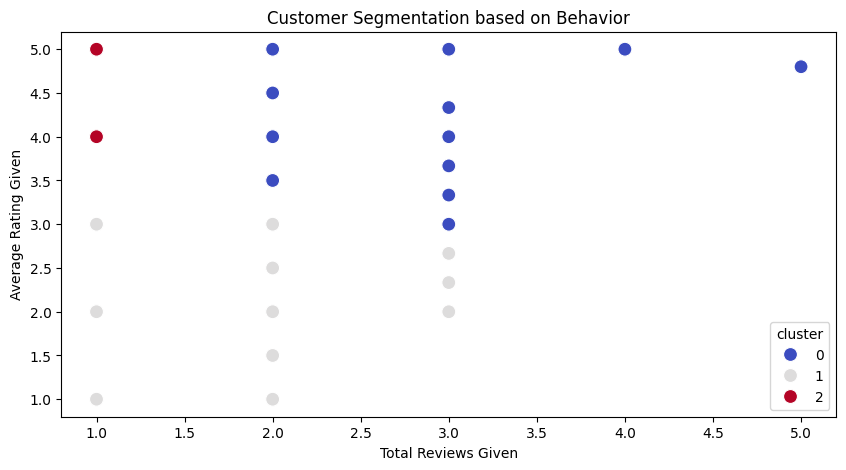

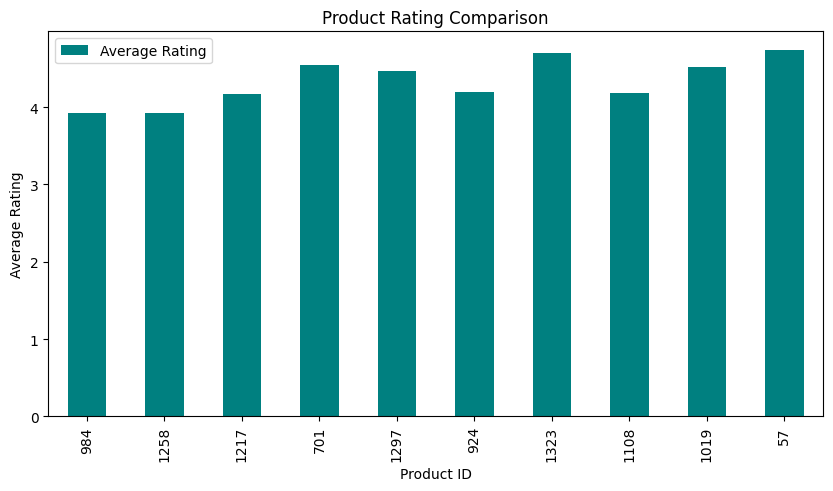

🔹 Purchase Prediction Accuracy: 1.0
🔹 Confusion Matrix:
 [[175   0]
 [  0 813]]


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, confusion_matrix

# ✅ Ensure column names are lowercase
df.columns = df.columns.str.lower()

# ✅ Automatically detect 'rating' column if it exists under a different name
rating_column = None
possible_rating_columns = ['rating', 'ratings', 'score', 'stars']

for col in possible_rating_columns:
    if col in df.columns:
        rating_column = col
        df.rename(columns={col: 'rating'}, inplace=True)
        print(f"🔹 Renamed column '{col}' to 'rating'")
        break

if not rating_column:
    print(f"⚠️ Columns in DataFrame: {df.columns}")
    raise KeyError("Could not find 'rating' or a suitable alternative.")

# ✅ Customer Segmentation - K-Means Clustering
user_features = df.groupby('user_id').agg({'rating': 'mean', 'product_id': 'count'}).reset_index()
user_features.columns = ['user_id', 'avg_rating', 'total_reviews']

kmeans = KMeans(n_clusters=3, random_state=42)
user_features['cluster'] = kmeans.fit_predict(user_features[['avg_rating', 'total_reviews']])

plt.figure(figsize=(10, 5))
sns.scatterplot(data=user_features, x='total_reviews', y='avg_rating', hue='cluster', palette='coolwarm', s=100)
plt.title("Customer Segmentation based on Behavior")
plt.xlabel("Total Reviews Given")
plt.ylabel("Average Rating Given")
plt.show()

# ✅ Sentiment Analysis on Reviews
if 'review_text' in df.columns:
    df['sentiment_score'] = df['review_text'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)

    plt.figure(figsize=(10, 5))
    sns.histplot(df['sentiment_score'], bins=30, kde=True, color='red')
    plt.title("Sentiment Score Distribution")
    plt.xlabel("Sentiment Score")
    plt.show()

# ✅ WordCloud for Product Reviews
if 'review_text' in df.columns:
    text = " ".join(review for review in df['review_text'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("WordCloud of Customer Reviews")
    plt.show()

# ✅ Time-Based Analysis of Ratings
if 'review_date' in df.columns:
    df['review_date'] = pd.to_datetime(df['review_date'])

    plt.figure(figsize=(12, 6))
    df.set_index('review_date')['rating'].resample('M').mean().plot(marker='o', color='blue')
    plt.title("Average Rating Over Time")
    plt.xlabel("Date")
    plt.ylabel("Average Rating")
    plt.show()

# ✅ Product Comparison Dashboard
top_products = df['product_id'].value_counts().head(10).index
comparison_df = df[df['product_id'].isin(top_products)].groupby('product_id').agg({'rating': ['mean', 'count']})
comparison_df.columns = ['Average Rating', 'Total Reviews']
comparison_df = comparison_df.sort_values(by='Total Reviews', ascending=False)

plt.figure(figsize=(10, 5))
comparison_df['Average Rating'].plot(kind='bar', color='teal', label='Average Rating')
plt.title("Product Rating Comparison")
plt.xlabel("Product ID")
plt.ylabel("Average Rating")
plt.legend()
plt.show()

# ✅ Customer Purchase Prediction
df['purchased'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
X = df[['user_id', 'product_id', 'rating']]
y = df['purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("🔹 Purchase Prediction Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔹 Renamed column 'rating' to 'rating'


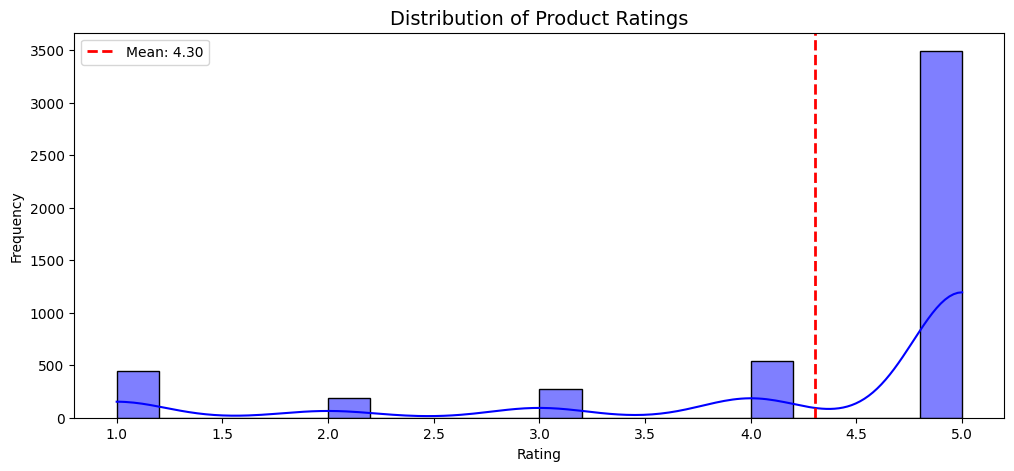

<ipython-input-26-dfdacac57748>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['rating'], palette="coolwarm")


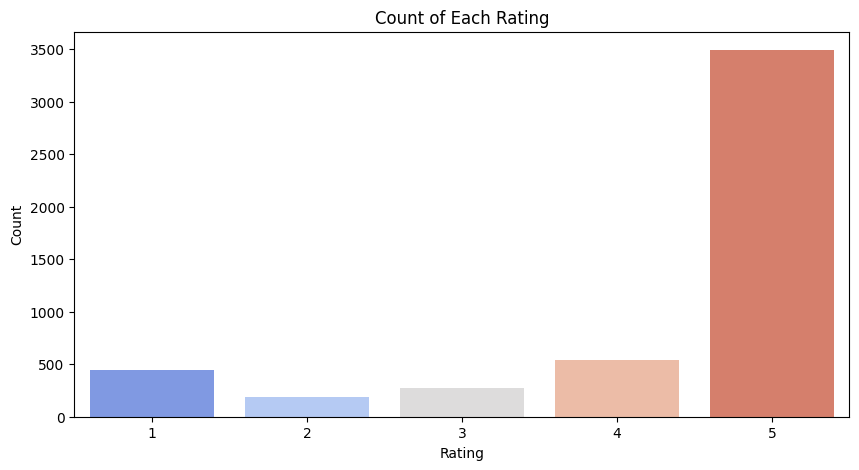

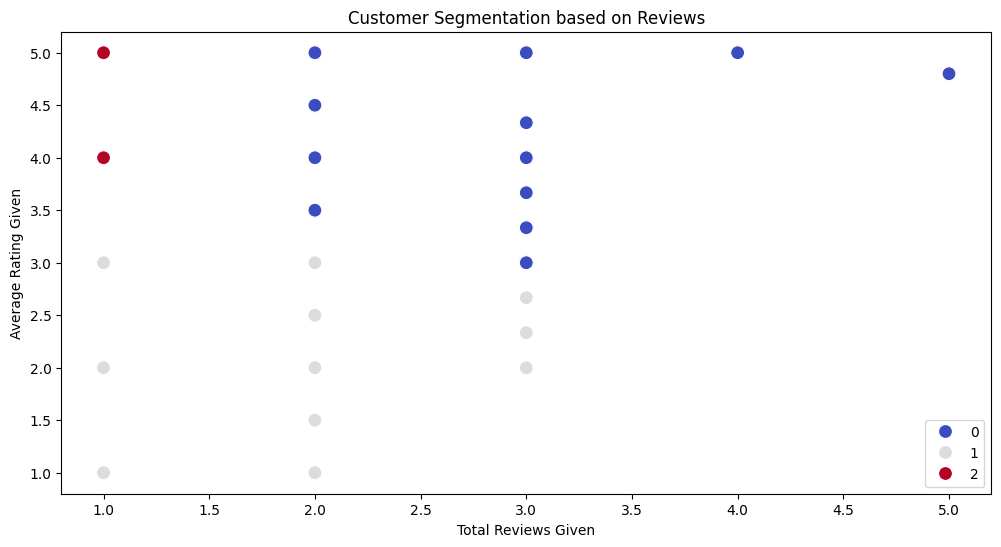

<ipython-input-26-dfdacac57748>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comparison_df.index, y=comparison_df['Total Reviews'], palette="magma")


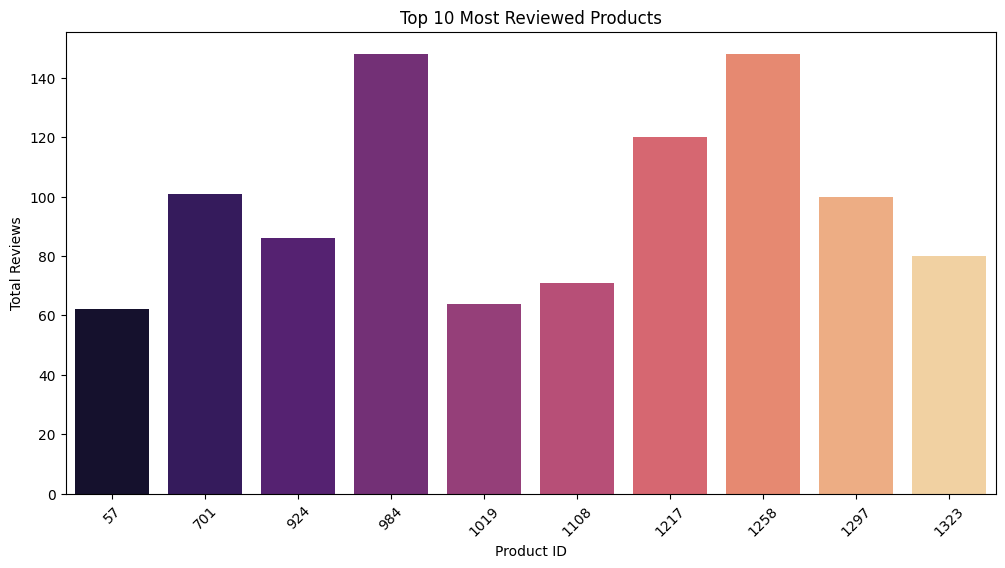

🔹 Purchase Prediction Accuracy: 1.0
🔹 Confusion Matrix:
 [[175   0]
 [  0 813]]


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# ✅ Ensure column names are lowercase
df.columns = df.columns.str.lower()

# ✅ Detect and rename the 'rating' column automatically
rating_column = None
possible_rating_columns = ['rating', 'ratings', 'score', 'stars']

for col in possible_rating_columns:
    if col in df.columns:
        rating_column = col
        df.rename(columns={col: 'rating'}, inplace=True)
        print(f"🔹 Renamed column '{col}' to 'rating'")
        break

if not rating_column:
    print(f"⚠️ Columns in DataFrame: {df.columns}")
    raise KeyError("Could not find 'rating' or a suitable alternative.")

# 🎯 **1. Ratings Distribution with KDE & Countplot**
plt.figure(figsize=(12, 5))
sns.histplot(df['rating'], bins=20, kde=True, color='blue')
plt.axvline(df['rating'].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df['rating'].mean():.2f}")
plt.title("Distribution of Product Ratings", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x=df['rating'], palette="coolwarm")
plt.title("Count of Each Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# 🎯 **2. Customer Segmentation - K-Means Clustering**
user_features = df.groupby('user_id').agg({'rating': 'mean', 'product_id': 'count'}).reset_index()
user_features.columns = ['user_id', 'avg_rating', 'total_reviews']

kmeans = KMeans(n_clusters=3, random_state=42)
user_features['cluster'] = kmeans.fit_predict(user_features[['avg_rating', 'total_reviews']])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=user_features, x='total_reviews', y='avg_rating', hue='cluster', palette='coolwarm', s=100)
plt.title("Customer Segmentation based on Reviews")
plt.xlabel("Total Reviews Given")
plt.ylabel("Average Rating Given")
plt.legend()
plt.show()

# 🎯 **3. WordCloud for Most Frequent Words in Reviews**
if 'review_text' in df.columns:
    text = " ".join(review for review in df['review_text'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most Frequent Words in Customer Reviews")
    plt.show()

# 🎯 **4. Monthly Trend Analysis of Average Ratings**
if 'review_date' in df.columns:
    df['review_date'] = pd.to_datetime(df['review_date'])

    plt.figure(figsize=(12, 6))
    df.set_index('review_date')['rating'].resample('M').mean().plot(marker='o', color='green', linestyle='dashed')
    plt.title("Average Product Rating Over Time")
    plt.xlabel("Date")
    plt.ylabel("Average Rating")
    plt.grid()
    plt.show()

# 🎯 **5. Sentiment Analysis of Reviews**
if 'review_text' in df.columns:
    df['sentiment_score'] = df['review_text'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)

    plt.figure(figsize=(12, 6))
    sns.histplot(df['sentiment_score'], bins=30, kde=True, color='purple')
    plt.axvline(df['sentiment_score'].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean Sentiment: {df['sentiment_score'].mean():.2f}")
    plt.title("Sentiment Analysis of Product Reviews")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# 🎯 **6. Top 10 Most Reviewed Products**
top_products = df['product_id'].value_counts().head(10).index
comparison_df = df[df['product_id'].isin(top_products)].groupby('product_id').agg({'rating': ['mean', 'count']})
comparison_df.columns = ['Average Rating', 'Total Reviews']
comparison_df = comparison_df.sort_values(by='Total Reviews', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=comparison_df.index, y=comparison_df['Total Reviews'], palette="magma")
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Product ID")
plt.ylabel("Total Reviews")
plt.xticks(rotation=45)
plt.show()

# 🎯 **7. Purchase Prediction using Random Forest**
df['purchased'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
X = df[['user_id', 'product_id', 'rating']]
y = df['purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("🔹 Purchase Prediction Accuracy:", accuracy_score(y_test, y_pred))
print("🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [27]:
df.to_csv("/content/cleaned_amazon_data.csv", index=False)
print("✅ Cleaned Data Saved for Power BI!")


✅ Cleaned Data Saved for Power BI!
